# Modelado:
### Instalación de dependencias

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import time

### Preprocesamiento de datos

In [7]:
# Cargar los datos
data = pd.read_csv('train.csv')

# Preprocesamiento de datos
# Limpieza de datos (Eliminación de valores nulos)
data = data.dropna()

# Codificación de variables categóricas
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Codificar la variable objetivo 'satisfaction'
data['satisfaction'] = LabelEncoder().fit_transform(data['satisfaction'])

# Normalización de datos numéricos
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Separar características y etiquetas
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Definición y entrenamiento de arquitecturas de red neuronal

Arquitectura A (sin regularización)

In [8]:
# Arquitectura A (sin regularización)
def build_model_A(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_A = build_model_A(X_train.shape[1])
model_A.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_A = model_A.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_A = time.time() - start_time

y_pred_A = (model_A.predict(X_test) > 0.5).astype("int32")

accuracy_A = accuracy_score(y_test, y_pred_A)
precision_A = precision_score(y_test, y_pred_A)
recall_A = recall_score(y_test, y_pred_A)
f1_A = f1_score(y_test, y_pred_A)

cm_A = confusion_matrix(y_test, y_pred_A)
tn_A, fp_A, fn_A, tp_A = cm_A.ravel()
specificity_A = tn_A / (tn_A + fp_A)

print(f'Arquitectura A - Precisión: {accuracy_A:.4f}, Recall: {recall_A:.4f}, Especificidad: {specificity_A:.4f}, F1-Score: {f1_A:.4f}')


Epoch 1/50
2072/2072 [==============================] - 10s 4ms/step - loss: 0.3422 - accuracy: 0.8636 - val_loss: 0.2098 - val_accuracy: 0.9225
Epoch 2/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2274 - accuracy: 0.9108 - val_loss: 0.1682 - val_accuracy: 0.9309
Epoch 3/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1994 - accuracy: 0.9197 - val_loss: 0.1507 - val_accuracy: 0.9378
Epoch 4/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1817 - accuracy: 0.9265 - val_loss: 0.1373 - val_accuracy: 0.9442
Epoch 5/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1697 - accuracy: 0.9317 - val_loss: 0.1286 - val_accuracy: 0.9460
Epoch 6/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1617 - accuracy: 0.9343 - val_loss: 0.1218 - val_accuracy: 0.9478
Epoch 7/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1551 - accuracy: 0.9384 - val_loss: 0.1176 - val_accuracy

Arquitectura B (con regularización L2)

In [9]:
# Arquitectura B (con regularización L2)
def build_model_B(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_B = build_model_B(X_train.shape[1])
model_B.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_B = model_B.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_B = time.time() - start_time

y_pred_B = (model_B.predict(X_test) > 0.5).astype("int32")

accuracy_B = accuracy_score(y_test, y_pred_B)
precision_B = precision_score(y_test, y_pred_B)
recall_B = recall_score(y_test, y_pred_B)
f1_B = f1_score(y_test, y_pred_B)

cm_B = confusion_matrix(y_test, y_pred_B)
tn_B, fp_B, fn_B, tp_B = cm_B.ravel()
specificity_B = tn_B / (tn_B + fp_B)

print(f'Arquitectura B - Precisión: {accuracy_B:.4f}, Recall: {recall_B:.4f}, Especificidad: {specificity_B:.4f}, F1-Score: {f1_B:.4f}')


Epoch 1/50
2072/2072 [==============================] - 11s 4ms/step - loss: 0.3990 - accuracy: 0.8631 - val_loss: 0.2454 - val_accuracy: 0.9222
Epoch 2/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2657 - accuracy: 0.9126 - val_loss: 0.2084 - val_accuracy: 0.9295
Epoch 3/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2344 - accuracy: 0.9209 - val_loss: 0.1885 - val_accuracy: 0.9366
Epoch 4/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9263 - val_loss: 0.1770 - val_accuracy: 0.9383
Epoch 5/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2086 - accuracy: 0.9301 - val_loss: 0.1640 - val_accuracy: 0.9437
Epoch 6/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2048 - accuracy: 0.9311 - val_loss: 0.1595 - val_accuracy: 0.9484
Epoch 7/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.1959 - accuracy: 0.9332 - val_loss: 0.1543 - val_accuracy

Arquitectura C (con regularización L1)

In [10]:
# Arquitectura C (con regularización L1)
from tensorflow.keras.regularizers import l1

def build_model_C(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_C = build_model_C(X_train.shape[1])
model_C.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_C = model_C.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_C = time.time() - start_time

y_pred_C = (model_C.predict(X_test) > 0.5).astype("int32")

accuracy_C = accuracy_score(y_test, y_pred_C)
precision_C = precision_score(y_test, y_pred_C)
recall_C = recall_score(y_test, y_pred_C)
f1_C = f1_score(y_test, y_pred_C)

cm_C = confusion_matrix(y_test, y_pred_C)
tn_C, fp_C, fn_C, tp_C = cm_C.ravel()
specificity_C = tn_C / (tn_C + fp_C)

print(f'Arquitectura C - Precisión: {accuracy_C:.4f}, Recall: {recall_C:.4f}, Especificidad: {specificity_C:.4f}, F1-Score: {f1_C:.4f}')


Epoch 1/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.5621 - accuracy: 0.8633 - val_loss: 0.3240 - val_accuracy: 0.9195
Epoch 2/50
2072/2072 [==============================] - 4s 2ms/step - loss: 0.3434 - accuracy: 0.9037 - val_loss: 0.2766 - val_accuracy: 0.9244
Epoch 3/50
2072/2072 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.9095 - val_loss: 0.2589 - val_accuracy: 0.9312
Epoch 4/50
2072/2072 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.9152 - val_loss: 0.2432 - val_accuracy: 0.9368
Epoch 5/50
2072/2072 [==============================] - 3s 1ms/step - loss: 0.2884 - accuracy: 0.9179 - val_loss: 0.2346 - val_accuracy: 0.9401
Epoch 6/50
2072/2072 [==============================] - 3s 1ms/step - loss: 0.2783 - accuracy: 0.9206 - val_loss: 0.2248 - val_accuracy: 0.9400
Epoch 7/50
2072/2072 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9213 - val_loss: 0.2206 - val_accuracy:

Arquitectura D (con regularización ElasticNet)

In [11]:
# Arquitectura D (con regularización ElasticNet)
from tensorflow.keras.regularizers import l1_l2

def build_model_D(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_D = build_model_D(X_train.shape[1])
model_D.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_D = model_D.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_D = time.time() - start_time

y_pred_D = (model_D.predict(X_test) > 0.5).astype("int32")

accuracy_D = accuracy_score(y_test, y_pred_D)
precision_D = precision_score(y_test, y_pred_D)
recall_D = recall_score(y_test, y_pred_D)
f1_D = f1_score(y_test, y_pred_D)

cm_D = confusion_matrix(y_test, y_pred_D)
tn_D, fp_D, fn_D, tp_D = cm_D.ravel()
specificity_D = tn_D / (tn_D + fp_D)

print(f'Arquitectura D - Precisión: {accuracy_D:.4f}, Recall: {recall_D:.4f}, Especificidad: {specificity_D:.4f}, F1-Score: {f1_D:.4f}')


Epoch 1/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.5632 - accuracy: 0.8590 - val_loss: 0.3256 - val_accuracy: 0.9152
Epoch 2/50
2072/2072 [==============================] - 4s 2ms/step - loss: 0.3511 - accuracy: 0.8990 - val_loss: 0.2840 - val_accuracy: 0.9261
Epoch 3/50
2072/2072 [==============================] - 3s 1ms/step - loss: 0.3269 - accuracy: 0.9054 - val_loss: 0.2662 - val_accuracy: 0.9277
Epoch 4/50
2072/2072 [==============================] - 3s 2ms/step - loss: 0.3071 - accuracy: 0.9116 - val_loss: 0.2509 - val_accuracy: 0.9292
Epoch 5/50
2072/2072 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.9150 - val_loss: 0.2405 - val_accuracy: 0.9330
Epoch 6/50
2072/2072 [==============================] - 3s 1ms/step - loss: 0.2902 - accuracy: 0.9161 - val_loss: 0.2349 - val_accuracy: 0.9393
Epoch 7/50
2072/2072 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9189 - val_loss: 0.2276 - val_accuracy:

Guardar y cargar modelos

In [12]:
# Guardar los modelos en formato nativo de Keras
model_A.save('model_A.keras')
model_B.save('model_B.keras')
model_C.save('model_C.keras')
model_D.save('model_D.keras')

# Cargar un modelo para probar
model_loaded = tf.keras.models.load_model('model_A.keras')

# Probar el modelo cargado
y_pred_loaded = (model_loaded.predict(X_test) > 0.5).astype("int32")

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)

cm_loaded = confusion_matrix(y_test, y_pred_loaded)
tn_loaded, fp_loaded, fn_loaded, tp_loaded = cm_loaded.ravel()
specificity_loaded = tn_loaded / (tn_loaded + fp_loaded)

print(f'Modelo cargado (Arquitectura A) - Precisión: {accuracy_loaded:.4f}, Recall: {recall_loaded:.4f}, Especificidad: {specificity_loaded:.4f}, F1-Score: {f1_loaded:.4f}')


648/648 [==============================] - 1s 880us/step
Modelo cargado (Arquitectura A) - Precisión: 0.9611, Recall: 0.9377, Especificidad: 0.9793, F1-Score: 0.9547


Recopilación de datos para el reporte técnico

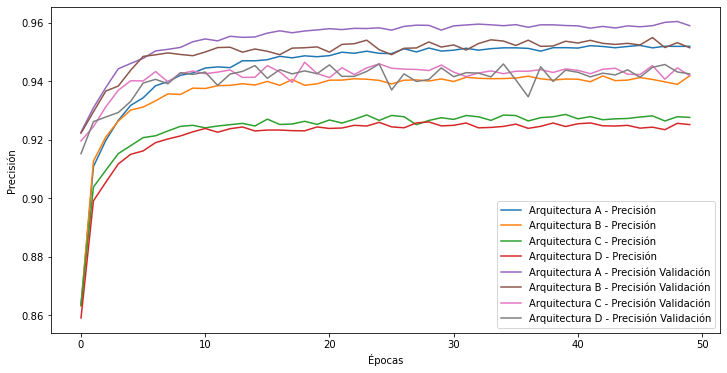

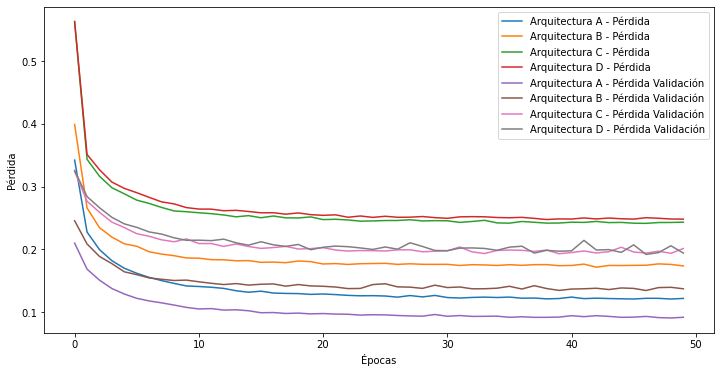

In [13]:
import matplotlib.pyplot as plt

# 1. Preprocesamiento de datos
preprocessing_techniques = """
1. Eliminación de valores nulos.
2. Codificación de variables categóricas utilizando one-hot encoding.
3. Codificación de la variable objetivo utilizando LabelEncoder.
4. Normalización de datos numéricos utilizando StandardScaler.
"""

# 2. Arquitecturas de la red neuronal
architecture_A_description = """
Arquitectura A:
- Capas: 3 capas densas.
- Neuronas: 64, 32, 1.
- Funciones de activación: ReLU, ReLU, Sigmoid.
- Dropout: 0.5.
"""

architecture_B_description = """
Arquitectura B:
- Capas: 3 capas densas.
- Neuronas: 64, 32, 1.
- Funciones de activación: ReLU, ReLU, Sigmoid.
- Regularización L2: 0.001.
- Dropout: 0.5.
"""

architecture_C_description = """
Arquitectura C:
- Capas: 3 capas densas.
- Neuronas: 64, 32, 1.
- Funciones de activación: ReLU, ReLU, Sigmoid.
- Regularización L1: 0.001.
- Dropout: 0.5.
"""

architecture_D_description = """
Arquitectura D:
- Capas: 3 capas densas.
- Neuronas: 64, 32, 1.
- Funciones de activación: ReLU, ReLU, Sigmoid.
- Regularización ElasticNet (L1: 0.001, L2: 0.001).
- Dropout: 0.5.
"""

# 3. Tabla comparativa de entrenamiento
training_comparison = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Tasa de aprendizaje": ["default", "default", "default", "default"],
    "Optimizador": ["adam", "adam", "adam", "adam"],
    "Tamaño de lote": [32, 32, 32, 32],
    "Número de épocas": [50, 50, 50, 50],
    "Tiempo aproximado de entrenamiento": [training_time_A, training_time_B, training_time_C, training_time_D],
    "Costo final después del entrenamiento": [history_A.history['loss'][-1], history_B.history['loss'][-1], history_C.history['loss'][-1], history_D.history['loss'][-1]]
})

# 4. Tabla comparativa de evaluación
evaluation_comparison = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Precisión": [accuracy_A, accuracy_B, accuracy_C, accuracy_D],
    "Recall": [recall_A, recall_B, recall_C, recall_D],
    "Especificidad": [specificity_A, specificity_B, specificity_C, specificity_D],
    "F1-Score": [f1_A, f1_B, f1_C, f1_D]
})

# Graficar las métricas de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history_A.history['accuracy'], label='Arquitectura A - Precisión')
plt.plot(history_B.history['accuracy'], label='Arquitectura B - Precisión')
plt.plot(history_C.history['accuracy'], label='Arquitectura C - Precisión')
plt.plot(history_D.history['accuracy'], label='Arquitectura D - Precisión')
plt.plot(history_A.history['val_accuracy'], label='Arquitectura A - Precisión Validación')
plt.plot(history_B.history['val_accuracy'], label='Arquitectura B - Precisión Validación')
plt.plot(history_C.history['val_accuracy'], label='Arquitectura C - Precisión Validación')
plt.plot(history_D.history['val_accuracy'], label='Arquitectura D - Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_A.history['loss'], label='Arquitectura A - Pérdida')
plt.plot(history_B.history['loss'], label='Arquitectura B - Pérdida')
plt.plot(history_C.history['loss'], label='Arquitectura C - Pérdida')
plt.plot(history_D.history['loss'], label='Arquitectura D - Pérdida')
plt.plot(history_A.history['val_loss'], label='Arquitectura A - Pérdida Validación')
plt.plot(history_B.history['val_loss'], label='Arquitectura B - Pérdida Validación')
plt.plot(history_C.history['val_loss'], label='Arquitectura C - Pérdida Validación')
plt.plot(history_D.history['val_loss'], label='Arquitectura D - Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [14]:
training_comparison

,Nombre de arquitectura,Tasa de aprendizaje,Optimizador,Tamaño de lote,Número de épocas,Tiempo aproximado de entrenamiento,Costo final después del entrenamiento
0,A,default,adam,32,50,382.162347,0.121577
1,B,default,adam,32,50,289.389022,0.173353
2,C,default,adam,32,50,179.286758,0.243168
3,D,default,adam,32,50,163.316238,0.247978


In [15]:
evaluation_comparison

,Nombre de arquitectura,Precisión,Recall,Especificidad,F1-Score
0,A,0.961099,0.937665,0.979322,0.954729
1,B,0.954824,0.926412,0.976920,0.947208
2,C,0.942372,0.894748,0.979408,0.931434
3,D,0.941213,0.930936,0.949206,0.932685


In [16]:
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1664      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


### Testing


In [17]:
test_data = pd.read_csv('test.csv')

test_data = test_data.dropna()

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

test_data['satisfaction'] = LabelEncoder().fit_transform(test_data['satisfaction'])

scaler = StandardScaler()
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[numeric_cols] = scaler.fit_transform(test_data[numeric_cols])

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    print(f'Precisión: {accuracy:.4f}, Recall: {recall:.4f}, Especificidad: {specificity:.4f}, F1-Score: {f1:.4f}')
    return accuracy, precision, recall, specificity, f1

print("Evaluación de Arquitectura A:")
accuracy_A, precision_A, recall_A, specificity_A, f1_A = evaluate_model(model_A, X_test, y_test)

print("\nEvaluación de Arquitectura B:")
accuracy_B, precision_B, recall_B, specificity_B, f1_B = evaluate_model(model_B, X_test, y_test)

print("\nEvaluación de Arquitectura C:")
accuracy_C, precision_C, recall_C, specificity_C, f1_C = evaluate_model(model_C, X_test, y_test)

print("\nEvaluación de Arquitectura D:")
accuracy_D, precision_D, recall_D, specificity_D, f1_D = evaluate_model(model_D, X_test, y_test)

evaluation_comparison_test = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Precisión": [accuracy_A, accuracy_B, accuracy_C, accuracy_D],
    "Recall": [recall_A, recall_B, recall_C, recall_D],
    "Especificidad": [specificity_A, specificity_B, specificity_C, specificity_D],
    "F1-Score": [f1_A, f1_B, f1_C, f1_D]
})

evaluation_comparison_test


Evaluación de Arquitectura A:
810/810 [==============================] - 1s 856us/step
Precisión: 0.9588, Recall: 0.9364, Especificidad: 0.9764, F1-Score: 0.9523

Evaluación de Arquitectura B:
810/810 [==============================] - 1s 947us/step
Precisión: 0.9522, Recall: 0.9255, Especificidad: 0.9731, F1-Score: 0.9444

Evaluación de Arquitectura C:
810/810 [==============================] - 1s 853us/step
Precisión: 0.9394, Recall: 0.8918, Especificidad: 0.9766, F1-Score: 0.9281

Evaluación de Arquitectura D:
810/810 [==============================] - 1s 916us/step
Precisión: 0.9416, Recall: 0.9356, Especificidad: 0.9464, F1-Score: 0.9337


,Nombre de arquitectura,Precisión,Recall,Especificidad,F1-Score
0,A,0.958831,0.936384,0.976390,0.952304
1,B,0.952188,0.925473,0.973086,0.944420
2,C,0.939366,0.891773,0.976597,0.928114
3,D,0.941644,0.935592,0.946379,0.933661
